<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [840]:
!pip install ucimlrepo

In [841]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [842]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [843]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

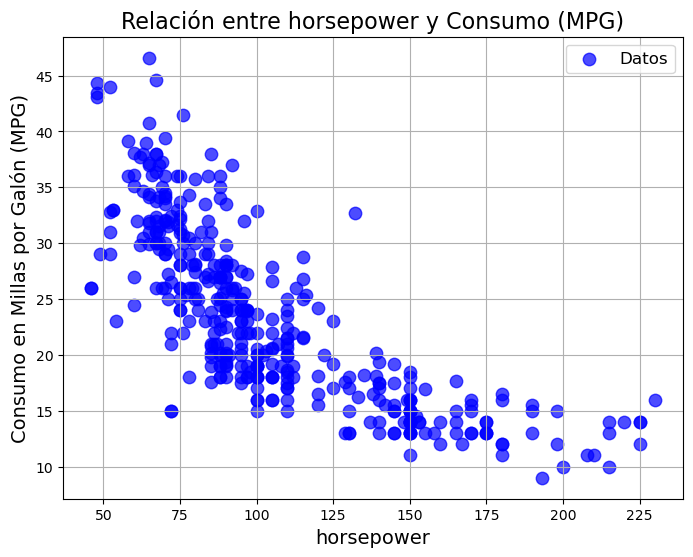

In [844]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    x = df[nombre_columna].to_numpy()
    y = y.to_numpy()

    # Crear el gráfico de dispersión
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', alpha=0.7, s=80, label='Datos')

    # Añadir etiquetas y título
    plt.title(f'Relación entre {nombre_columna} y Consumo (MPG)', fontsize=16)
    plt.xlabel(nombre_columna, fontsize=14)
    plt.ylabel('Consumo en Millas por Galón (MPG)', fontsize=14)
    plt.grid(True)

    # Mostrar la gráfica
    plt.legend(fontsize=12)
    plt.show()
    

visualiza(X, y, 'horsepower')

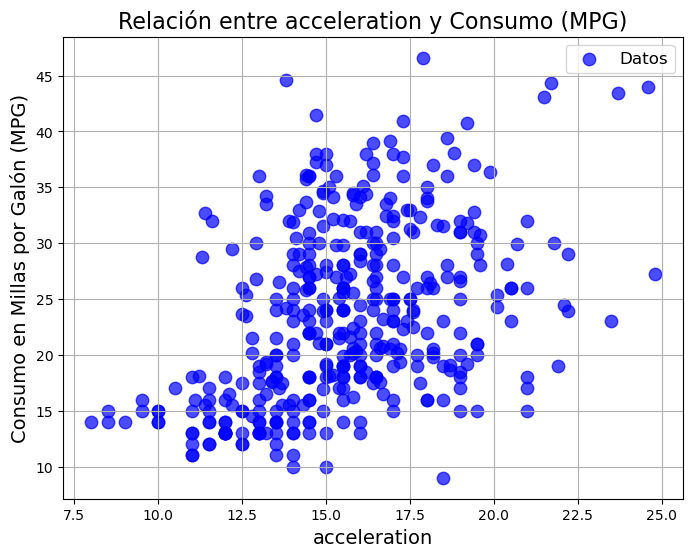

In [845]:
visualiza(X, y, 'acceleration')

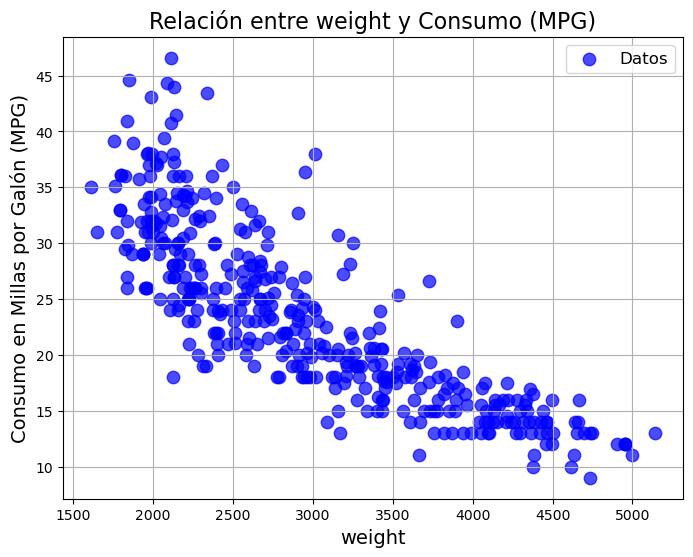

In [846]:
visualiza(X, y, 'weight')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [847]:
import numpy as np

def pesos_ols(X, y):
    # Implementa la fórmula matricial
    
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así
    if X.shape[0] > X.shape[1]:
        X = X.T  # Transponer si hay más filas que columnas (más observaciones que features)
    
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 
    X = np.vstack([np.ones(X.shape[1]), X]) 

    # TODO 3 Calcula los pesos
    w = np.linalg.inv(X @ X.T) @ X @ y
    return w

In [848]:
# Array de prueba!!
X_prueba = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y_prueba = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X_prueba, y_prueba)

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

Hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

In [849]:
# TODO Aplica el modelo y dibuja la recta junto con los datos
X = X[['weight']].to_numpy()
y = y.to_numpy().astype(float) 
w = pesos_ols(X, y)
X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
y_pred = X_bias @ w


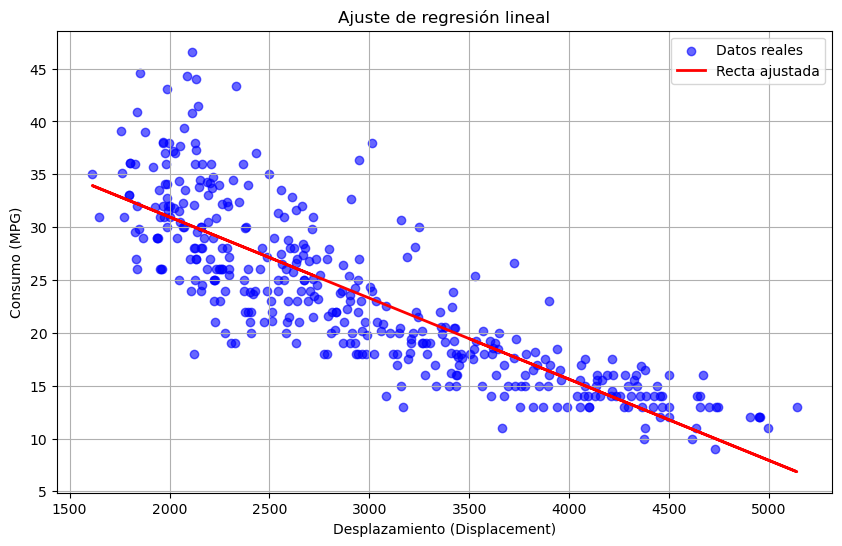

In [850]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Recta ajustada', linewidth=2)
plt.xlabel('Desplazamiento (Displacement)')
plt.ylabel('Consumo (MPG)')
plt.title('Ajuste de regresión lineal')
plt.legend()
plt.grid(True)
plt.show()

Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [851]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


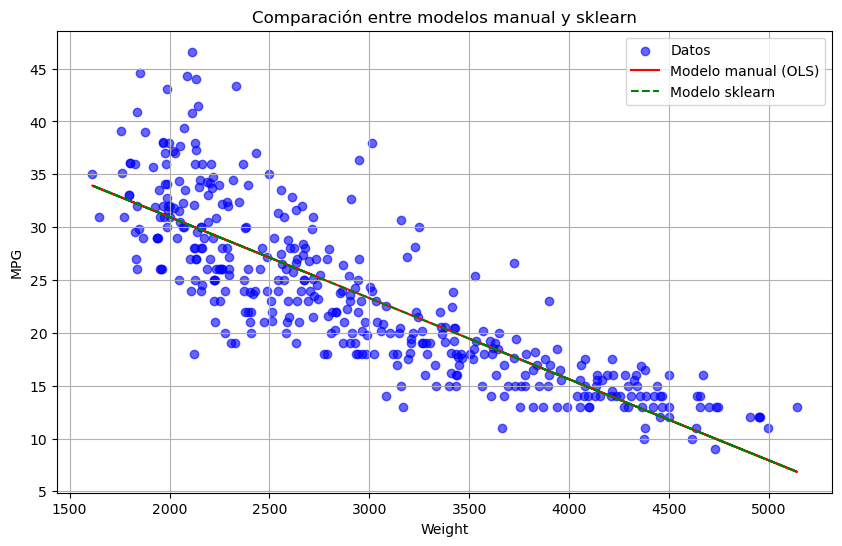

In [852]:
x_vals = X_lr.to_numpy().flatten()
y_vals = y_lr.to_numpy()

# Recta del modelo manual
y_pred_manual = w[0] + w[1] * x_vals

# Recta del modelo de sklearn
y_pred_sklearn = lr.intercept_ + lr.coef_[0] * x_vals

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(x_vals, y_vals, color='blue', alpha=0.6, label='Datos')
plt.plot(x_vals, y_pred_manual, color='red', label='Modelo manual (OLS)')
plt.plot(x_vals, y_pred_sklearn, color='green', linestyle='--', label='Modelo sklearn')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Comparación entre modelos manual y sklearn')
plt.legend()
plt.grid(True)
plt.show()

In [853]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones
rmse_manual = np.sqrt(mean_squared_error(y_vals, y_pred_manual))
r2_manual = r2_score(y_vals, y_pred_manual)

rmse_sklearn = np.sqrt(mean_squared_error(y_vals, y_pred_sklearn))
r2_sklearn = r2_score(y_vals, y_pred_sklearn)

# Comparación de métricas
print("Manual OLS - RMSE:", rmse_manual, "R^2:", r2_manual)
print("Sklearn - RMSE:", rmse_sklearn, "R^2:", r2_sklearn)

Manual OLS - RMSE: 4.333698159150957 R^2: 0.6917929800341573
Sklearn - RMSE: 4.333698159150957 R^2: 0.6917929800341573


In [854]:
print(y.describe())

              mpg
count  398.000000
mean    23.514573
std      7.815984
min      9.000000
25%     17.500000
50%     23.000000
75%     29.000000
max     46.600000


Los resultados obtenidos con nuestro modelo y aquellos conseguidos por sklearn son identicos.

Teniendo en cuenta que el rango de valores de millas por galon **mpg** va de las 9 a las 46 millas y que la desviación típica es de 7.8 millas.  Un RMSE de 4.33 que mide la magnitud de los errores en las predicciones es aceptable.
En cuanto al R^2 nos viene a decir que el modelo explica aproximadamente el 70% de la variabilidad de la variable respuesta, es decir, millas por galon. Que un modelo con una unica variable consiga sea tan explicativo es reseñable y no suele ser comun.

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal

El método de mínimos cuadrados proporciona una solución cerrada mediante la ecuación normal $(X^TX)^{-1}X^Ty$.

Esta aproximación garantiza el óptimo global pero al coste de una complejidad O(n³) frente a una complejidad O(n²) del método del descenso de gradiente.
Por tanto para conjuntos de datos grandes es inviable computacionalmente hablando. 

Otro punto negativo del método de mínimos cuadrados es la necesidad de contar con todos los datos lo que lo hace inadecuado. 

Penaliza cuando tenemos que actualizar el modelo constantemente y/o con datos en tiempo real. 

En cambio el método del descenso de gradiente permite el procesamiento por lotes y es más sencillo de paralelizar.

El método del descenso de gradiente ofrece una mayor flexibilidad ya que puede hacer uso de distintas funciones de pérdida y por tanto adaptarse una casuística mas amplia


## 2. Optimización con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la práctica, pero podéis hacerlo si queréis practicar más sobre el método del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [855]:

def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte
    
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # TODO 1 Añade la columna de 1s
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    # TODO 2 Haz un bucle para las iteraciones 
    for i in range(n_iter):
        # Calcular predicciones con los pesos actuales
        y_pred = X_b.dot(w)
        
        # Calcular el error (RSS) actual
        loss = 0.5 * np.sum((y  - y_pred) ** 2)
        
        # Calcular el gradiente
        gradient = X_b.T.dot(X_b.dot(w) - y)
        
        # Actualizar los pesos usando la regla del descenso del gradiente
        w = w - eta * gradient
        
        # Guardar los resultados de esta iteración
        w_iter.append(w)
        loss_iter.append(loss)

    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)


array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])


In [856]:
eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])

[[183845.82320222]
 [ 40415.66453324]]


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [857]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

In [858]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd = (X_np - X_np.mean()) / X_np.std()
y_gd = (y_np - y_np.mean()) / y_np.std()

# TODO 1 Punto inicial y learning rate
w0 = np.zeros((2, 1))  # Iniciamos con [0, 0] para el bias y el peso
n_iter = 1000          # Número de iteraciones suficiente para convergencia
eta = 0.0001            # Learning rate moderado para datos escalados

# TODO 2 Aplicamos el algoritmo
weights, loss = gradient_descent(X_gd, y_gd, w0, n_iter, eta)


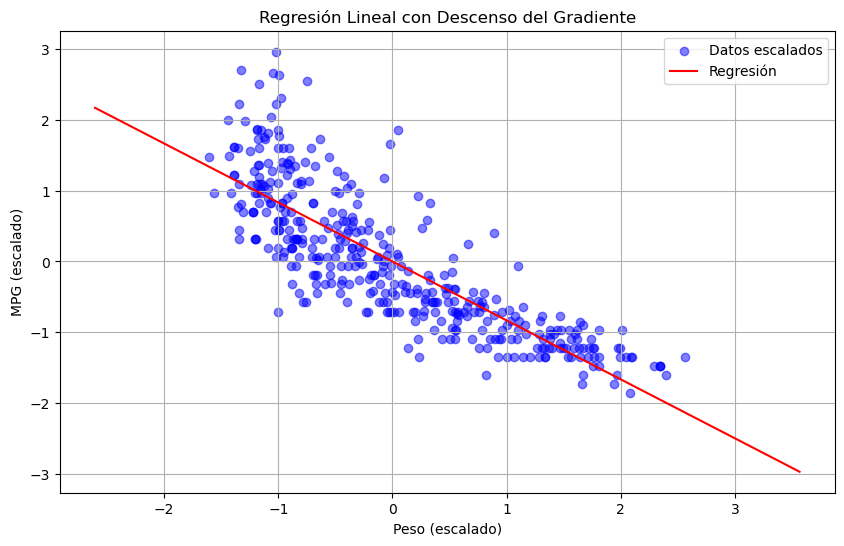

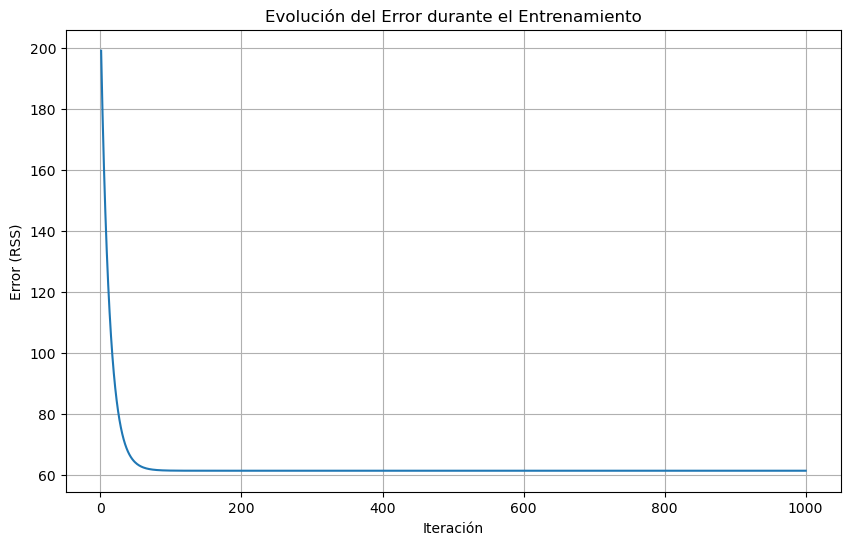

In [859]:
# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_gd, y_gd, color='blue', alpha=0.5, label='Datos escalados')

x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) - 1
x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
X_line = np.c_[np.ones(100), x_line]
y_line = X_line.dot(weights[-1])

plt.plot(x_line, y_line, color='red', label='Regresión')
plt.xlabel('Peso (escalado)')
plt.ylabel('MPG (escalado)')
plt.title('Regresión Lineal con Descenso del Gradiente')
plt.legend()
plt.grid(True)
plt.show()

# Evolución del error
plt.figure(figsize=(10, 6))
plt.plot(loss)
plt.xlabel('Iteración')
plt.ylabel('Error (RSS)')
plt.title('Evolución del Error durante el Entrenamiento')
plt.grid(True)
plt.show()